Creat per Josep Añó

# Programa para sacar información de temperatura comunidad valenciana a través de la web AVAMET, Associació Valenciana de Meteorologia


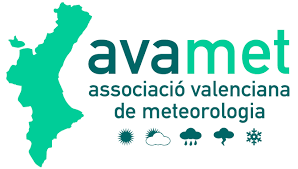

In [102]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import datetime
#@title 
Territorio_option= "TOT EL TERRITORI" #@param ['TOT EL TERRITORI', 'Prov. Castelló', '   els Ports', '   l′Alt Maestrat', '   el Baix Maestrat', '   l′Alcalatén', '   la Plana Alta', '   la Plana Baixa', '   l′Alt Palància', '   l′Alt Millars', 'Prov. València', '   el Racó d′Ademús', '   els Serrans', '   el Camp de Túria', '   el Camp de Morvedre', '   l′Horta Nord', '   l′Horta Oest', '   València', '   l′Horta Sud', '   la Plana d′Utiel-Requena', '   la Foia de Bunyol', '   la Vall de Cofrents-Aiora', '   la Ribera Alta', '   la Ribera Baixa', '   la Canal de Navarrés', '   la Costera', '   la Vall d′Albaida', '   la Safor', 'Prov. Alacant', '   el Comtat', '   l′Alcoià', '   l′Alt Vinalopó', '   el Vinalopó Mitjà', '   la Marina Alta', '   la Marina Baixa', '   l′Alacantí', '   el Baix Vinalopó', '   el Baix Segura']
#Start_date i End_date barrido fechas a realizar
#@title Date fields
Start_date= '2018-11-22'#@param {type:"date"}
End_date= '2020-10-22'#@param {type:"date"}

In [103]:
fecha = '2021-02-10'
r = requests.get("https://www.avamet.org/mx-meteoxarxa.php", params={'id':fecha})
soup = BeautifulSoup(r.text, "html.parser")

In [104]:
def elegir_territorio(eleccion,dato1, dato2):  #funciona elegir territorio
  z=0
  for i in dato1:   
    if i==eleccion:
     salida_func=dato2[z]
    z=z+1 
  return salida_func 

In [105]:

valores_territori=soup.find("select", attrs={'name':"freg_territori"})
valores_territori_option=valores_territori.find_all("option")

articulo = []
for i in valores_territori.find_all('option'):
    articulo.append(i.text)

articulo2 = [valores_territori_option.get('value') for valores_territori_option in valores_territori_option]

options=pd.DataFrame(articulo, articulo2)
#En options encontramos los valores de territorio a elegir


Territorio=elegir_territorio(Territorio_option, articulo, articulo2)

Start_date=datetime.datetime.strptime(Start_date, '%Y-%m-%d')
End_date=datetime.datetime.strptime(End_date, '%Y-%m-%d')


def clase_rEsta(tag):
    return tag.find(class_="rEsta")


def function_date(Start_date,End_date, territori):
  data_matrix_final=pd.DataFrame()
  data_matrix_final=columns = ['localidad','Temp','Tmax','Tmin','Humedad','Precip',
                      'Vel.viento','Dir.viento','Vmax_viento','Data']
  i=1
  d={}
  while Start_date <=End_date:
    
    Fecha=Start_date.strftime("%Y-%m-%d")
    Start_date=Start_date+datetime.timedelta(days=1)
    i=i+1
    print(Fecha)
    url="https://www.avamet.org/mx-meteoxarxa.php?id="+Fecha+"&"+"territori="+territori
    r = requests.get(url, params={'id':Fecha})
    soup = BeautifulSoup(r.text, "html.parser")
    tabla = soup.find("table", class_="tDades")
    loc = tabla.find_all(clase_rEsta)
    datos = [[t.text.strip() for t in l.find_all("td")] for l in loc]
    data_matrix =pd.DataFrame(datos)
    data_matrix[""]=Fecha
    d["data_Matrix{0}".format(i)]=data_matrix
  data_matrix_final=pd.concat(d,ignore_index=True)
  return data_matrix_final

salida=function_date(Start_date,End_date,Territorio)


salida.columns = ['localidad','Temp','Tmax','Tmin','Humedad','Precip',
                     'Vel.viento','Dir.viento','Vmax_viento','Timestamp']

salida.to_csv('AVAMET.csv', index=False)
salida


2018-11-22
2018-11-23
2018-11-24
2018-11-25
2018-11-26
2018-11-27
2018-11-28
2018-11-29
2018-11-30
2018-12-01
2018-12-02
2018-12-03
2018-12-04
2018-12-05
2018-12-06
2018-12-07
2018-12-08
2018-12-09
2018-12-10
2018-12-11
2018-12-12
2018-12-13
2018-12-14
2018-12-15
2018-12-16
2018-12-17
2018-12-18
2018-12-19
2018-12-20
2018-12-21
2018-12-22
2018-12-23
2018-12-24
2018-12-25
2018-12-26
2018-12-27
2018-12-28
2018-12-29
2018-12-30
2018-12-31
2019-01-01
2019-01-02
2019-01-03
2019-01-04
2019-01-05
2019-01-06
2019-01-07
2019-01-08
2019-01-09
2019-01-10
2019-01-11
2019-01-12
2019-01-13
2019-01-14
2019-01-15
2019-01-16
2019-01-17
2019-01-18
2019-01-19
2019-01-20
2019-01-21
2019-01-22
2019-01-23
2019-01-24
2019-01-25
2019-01-26
2019-01-27
2019-01-28
2019-01-29
2019-01-30
2019-01-31
2019-02-01
2019-02-02
2019-02-03
2019-02-04
2019-02-05
2019-02-06
2019-02-07
2019-02-08
2019-02-09
2019-02-10
2019-02-11
2019-02-12
2019-02-13
2019-02-14
2019-02-15
2019-02-16
2019-02-17
2019-02-18
2019-02-19
2019-02-20

,localidad,Temp,Tmax,Tmin,Humedad,Precip,Vel.viento,Dir.viento,Vmax_viento,Timestamp
0,CastellfortAEMET,"4,5","6,5","8,5",,"0,2",,,,2018-11-22
1,Cinctorres,"2,7","6,1","10,0",82,"0,0","2,3",SSO,"14,5",2018-11-22
2,Morellacentre,"5,8","7,5","10,3",76,"0,0","2,9",ENE,"16,1",2018-11-22
3,MorellaFàbrica Giner,"1,2","5,1","11,4",90,"0,0","0,0",SSE,"9,7",2018-11-22
4,Portell de Morella,"3,3","6,2","9,9",80,"0,0","1,8",SSE,"22,5",2018-11-22
...,...,...,...,...,...,...,...,...,...,...
399155,CalamochaValverde,"10,8","13,6","16,3",68,"0,2",,,"48,0",2020-10-22
399156,Torremocha del Jiloca,"8,9","13,1","18,7",77,"0,6","6,4",SE,"30,6",2020-10-22
399157,Monteagudo del CastilloEl Portero,"7,5","10,3","14,0",87,"0,0","1,9",NE,"17,0",2020-10-22
399158,Bronchales,"7,7","9,3","11,9",81,"1,0","10,9",S,"37,0",2020-10-22
